[View in Colaboratory](https://colab.research.google.com/github/rupamcyrax799/ML-learning/blob/master/tensor%20flow.ipynb)

In [0]:
import numpy as np 
import tensorflow as tf 
import matplotlib.pyplot as plt 

In [0]:
tl= tf.constant(2.0, dtype=tf.float32)

In [3]:
print(tl)

Tensor("Const:0", shape=(), dtype=float32)


In [0]:
tl= tf.constant(2.0, dtype=tf.float32, name ='my')

In [5]:
print(tl)

Tensor("my:0", shape=(), dtype=float32)


In [8]:
t2=tf.constant([1.0,2.0],dtype=tf.float32, name ='my2')
print (t2)

Tensor("my2_1:0", shape=(2,), dtype=float32)


In [10]:
ses=tf.Session()
print(ses.run(tl))

2.0


In [11]:
ses.run(t2)

array([1., 2.], dtype=float32)

In [13]:
t3=tf.constant([[1.0,2.0,3.0],
              [5.0,6.0,7.0]],dtype=tf.float32, name ='my3')
print(ses.run(t3))

[[1. 2. 3.]
 [5. 6. 7.]]


In [14]:
t3

<tf.Tensor 'my3:0' shape=(2, 3) dtype=float32>

In [0]:
ses.close()

In [16]:
with tf.Session()as sess:
  print(sess.run(tl))
  print(sess.run(t2))
  print(sess.run(t3))

2.0
[1. 2.]
[[1. 2. 3.]
 [5. 6. 7.]]


In [0]:
node_1= tf.constant(2.0, dtype=tf.float32, name ='leaf_node1')
node_2= tf.constant(3.0, dtype=tf.float32, name ='leaf_node1')
node_3= tf.constant(5.0, dtype=tf.float32, name ='leaf_node1')

cg_1=(node_1+node_2)*node_3

In [22]:
with tf.Session()as sess:
  print(sess.run(cg_1))

25.0


In [0]:
node_1= tf.constant(7.0, dtype=tf.float32, name ='leaf_node1')
node_2= tf.constant(8.0, dtype=tf.float32, name ='leaf_node1')
node_3= tf.constant(4.0, dtype=tf.float32, name ='leaf_node1')
node_4= tf.constant(10.0, dtype=tf.float32, name ='leaf_node1')
node_5= tf.constant(7.0, dtype=tf.float32, name ='leaf_node1')
node_6= tf.constant(10.0, dtype=tf.float32, name ='leaf_node1')
node_7= tf.constant(19.5, dtype=tf.float32, name ='leaf_node1')

cg_2=tf.maximum((node_1+node_2)-(node_3+node_4),((node_5*node_6)/node_7))


In [28]:
with tf.Session()as sess:
  print(sess.run(cg_2))

3.5897436


In [29]:
node_1= tf.constant([9,10,11], dtype=tf.float32, name ='leaf_node1')
node_2= tf.constant([7,8,6.5], dtype=tf.float32, name ='leaf_node1')
node_3= tf.constant(5.6, dtype=tf.float32, name ='leaf_node1')
node_4= tf.constant([7.5,9,6.75], dtype=tf.float32, name ='leaf_node1')
node_5= tf.constant([13.5,7.18,17], dtype=tf.float32, name ='leaf_node1')

cg_3=tf.minimum(((node_1*node_2)/node_3),node_4+node_5)

with tf.Session()as sess:
  print(sess.run(cg_3))

[11.25     14.285714 12.767858]


***linear regression***

In [0]:
X=np.linspace(30,300.0,300)
Y=np.linspace(-25.0,200,300)+np.random.rand(*X.shape)

In [0]:
train_X=X[:250]
train_Y=Y[:250]

test_X=X[250:]
test_Y=Y[250:]

In [0]:
learning_rate=0.001
n_epochs=1000
interval=50


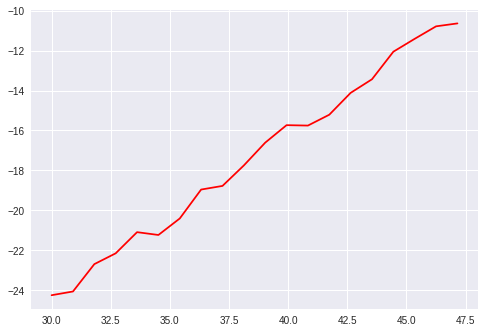

In [38]:
plt.plot(train_X[:20],train_Y[:20],'R')
plt.show()

In [0]:
x=tf.placeholder(tf.float32, name='x')
y=tf.placeholder(tf.float32, name='y')

In [0]:
W=tf.Variable(0.0,name='weight_1')
b=tf.Variable(0.0,name='bias')

pred_y=(W*x)+b

In [0]:
#loss function
loss=tf.reduce_mean(tf.square(y-pred_y))

In [0]:
#optimizer
optimizer=tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(loss)

In [56]:
with tf.Session()as sess:
  sess.run(tf.global_variables_initializer())
  
for epoch in range(n_epochs):
  _, curr_loss=sess.run([optimizer,loss],feed_dict={x:train_X,y:train_Y})
                                                    
  if epoch%interval ==0:
    print('loss after epoch','is',curr_loss)
    
  final_preds,final_loss=sess.run([pred_y,loss],feed_dict={x:test_X,
                                                y:test_Y})
  print('the final loss is : ',final_loss)
  
  

RuntimeError: ignored